<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [411]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [412]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [413]:
import pandas as pd
import seaborn as sns 

## Demo: How to run an sql query


In [414]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [415]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [416]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [417]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


In [418]:
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)

### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: xlabel='ConvertedComp', ylabel='Count'>

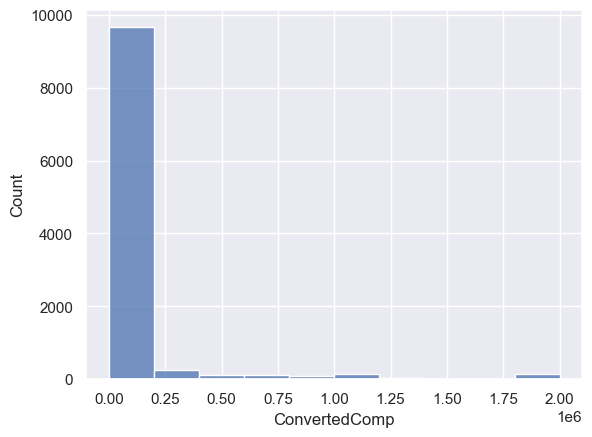

In [419]:
sns.histplot(df["ConvertedComp"], bins=10)

### Box Plots


Plot a box plot of `Age.`


<Axes: >

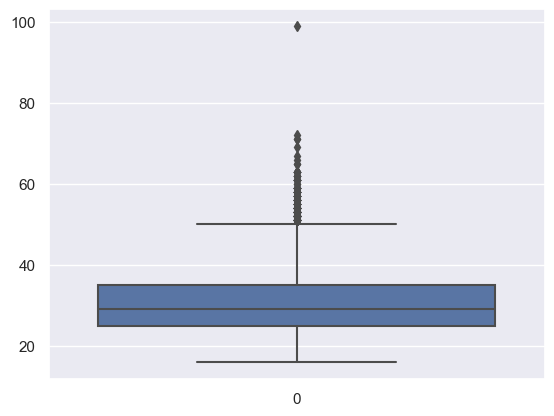

In [420]:
sns.boxplot(df["Age"])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

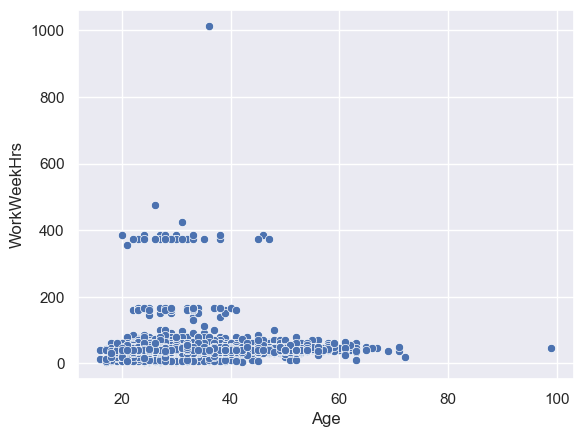

In [421]:
sns.scatterplot(df, x='Age', y='WorkWeekHrs')

In [422]:
corr_matrix = df.corr()

# Extract the correlation coefficients between Age and all other numerical columns
age_corr = corr_matrix['Age'].drop('Age')

# Print the correlation coefficients
print(age_corr)

index            0.004177
Respondent       0.004048
CompTotal        0.006966
ConvertedComp    0.105412
WorkWeekHrs      0.036517
CodeRevHrs      -0.020498
Name: Age, dtype: float64


C:\Users\hugot\AppData\Local\Temp\ipykernel_13120\2708378993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

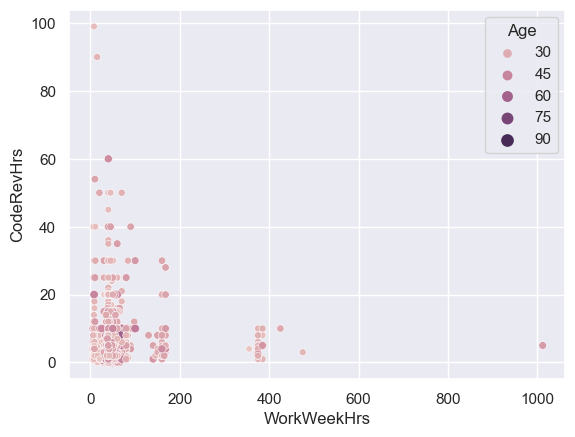

In [423]:
sns.scatterplot(df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age')

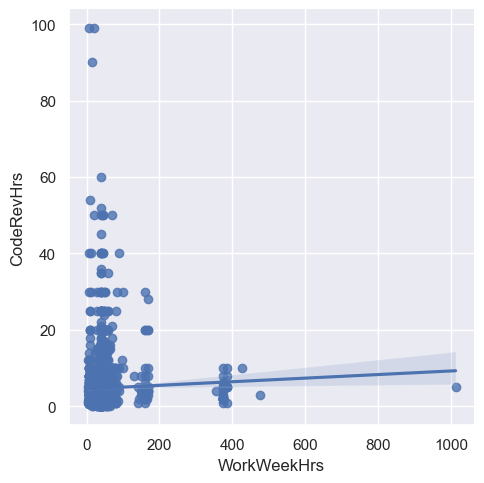

In [424]:
sns.lmplot(df, x = 'WorkWeekHrs', y = 'CodeRevHrs')

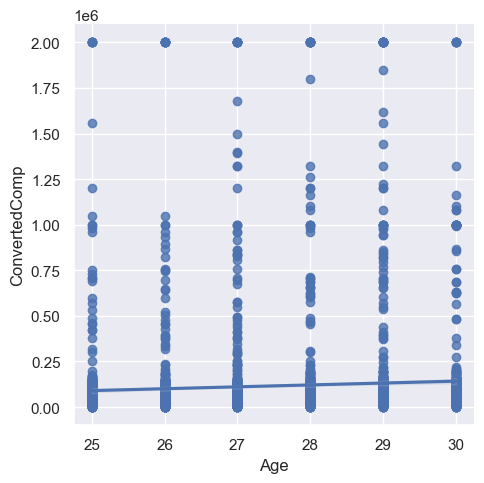

In [425]:
QUERY = """
SELECT * FROM master where Age >= 25 and Age <=30
"""
df = pd.read_sql_query(QUERY,conn)

sns.lmplot(df, x = 'Age', y = 'ConvertedComp')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x24b268c0910>,
 [Text(0.782460943602955, 0.7731460869305189, 'PostgreSQL'),
  Text(-0.6614558538043755, 0.8789062256395301, 'MongoDB'),
  Text(-1.0401617758478325, -0.35785958149123726, 'Redis'),
  Text(-0.05356333651009637, -1.0986951210330855, 'MySQL'),
  Text(0.9576877798968915, -0.5411414937298409, 'Elasticsearch')],
 [Text(0.4267968783288845, 0.42171604741664664, '24.8%'),
  Text(-0.36079410207511386, 0.47940339580338004, '20.9%'),
  Text(-0.5673609686442722, -0.1951961353588567, '19.1%'),
  Text(-0.02921636536914347, -0.5992882478362284, '18.8%'),
  Text(0.5223751526710316, -0.2951680874890041, '16.4%')])

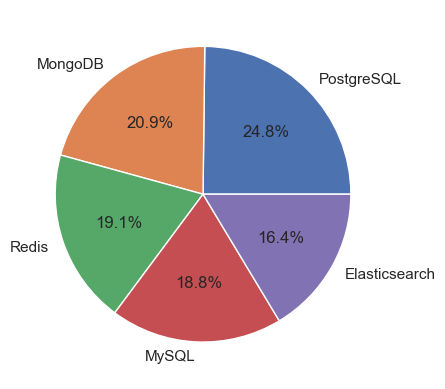

In [426]:
import matplotlib.pyplot as plt

QUERY = """
SELECT * FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)

top_5 = df['DatabaseDesireNextYear'].value_counts().head(5)

plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

In the list of most popular languages respondents wish to learn next year, what is the rank of Python?


([<matplotlib.patches.Wedge at 0x24b2be23b80>,
 [Text(0.7726198006779451, 0.78298061508595, 'JavaScript'),
  Text(-0.6655599729548589, 0.8758024448471969, 'HTML/CSS'),
  Text(-1.0365032704151453, -0.3683218299513461, 'Python'),
  Text(-0.005190751137038743, -1.0999877527057442, 'SQL'),
  Text(0.9714054536730958, -0.516111852774345, 'TypeScript')],
 [Text(0.42142898218797004, 0.4270803355014272, '25.2%'),
  Text(-0.36303271252083213, 0.4777104244621074, '20.3%'),
  Text(-0.5653654202264428, -0.20090281633709786, '19.9%'),
  Text(-0.0028313188020211324, -0.5999933196576785, '19.1%'),
  Text(0.529857520185325, -0.28151555605873363, '15.5%')])

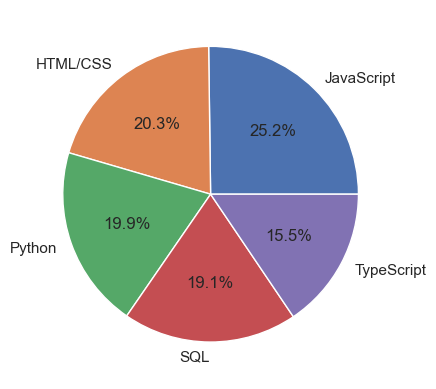

In [427]:

QUERY = """
SELECT * FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)

top_5 = df['LanguageDesireNextYear'].value_counts().head(5)

plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x24b25a437c0>,
 [Text(0.5903570179479922, 0.9281587102212392, 'Developer, full-stack'),
  Text(-1.073195838446063, 0.24135180202777035, 'Developer, back-end'),
  Text(-0.33761292057436754, -1.0469085518139805, 'Developer, front-end'),
  Text(0.6476725459455762, -0.8891120701173592, 'Developer, desktop or enterprise applications'),
  Text(1.0559431615552475, -0.30819480781594705, 'Developer, mobile')],
 [Text(0.32201291888072303, 0.5062683873934031, '32.0%'),
  Text(-0.585379548243307, 0.1316464374696929, '29.0%'),
  Text(-0.1841525021314732, -0.5710410282621711, '18.1%'),
  Text(0.3532759341521325, -0.484970220064014, '11.9%'),
  Text(0.5759689972119532, -0.16810625880869837, '9.0%')])

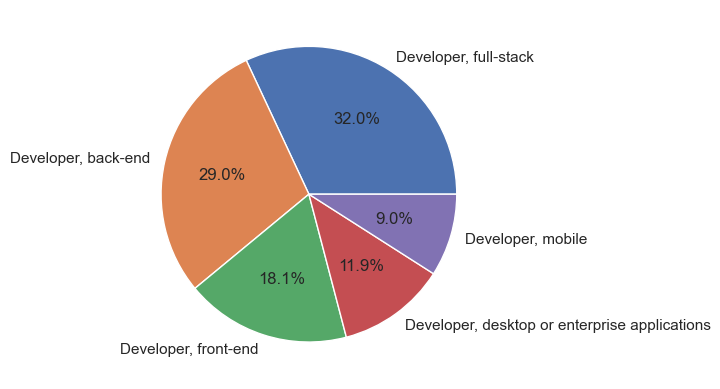

In [428]:
QUERY = """
SELECT * FROM DevType
"""
df = pd.read_sql_query(QUERY,conn)

top_5 = df['DevType'].value_counts().head(5)

plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

How many respondents indicated that they currently work with 'SQL'? 



In [429]:
QUERY = """
SELECT * FROM LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)

# Count the number of rows where SQL is the only language
(df['LanguageWorkedWith'] == 'SQL').sum()

7106

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [430]:
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)

<Axes: xlabel='Age'>

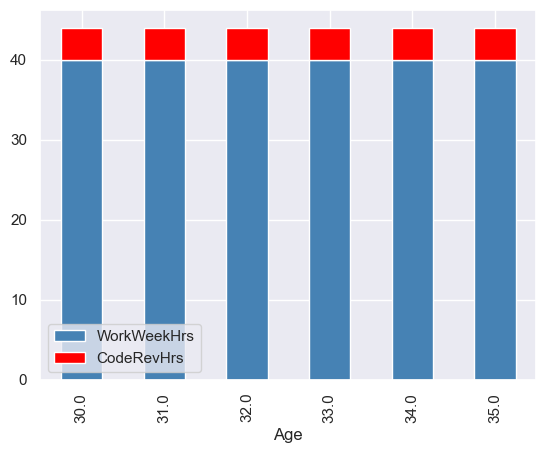

In [431]:
filtered_data = df[(df['Age'] >= 30) & (df['Age'] <= 35)]
grouped_data = filtered_data.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
colors_list = ['steelblue', 'red']
grouped_data.plot(kind='bar', stacked=True, color=colors_list)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: xlabel='Age'>

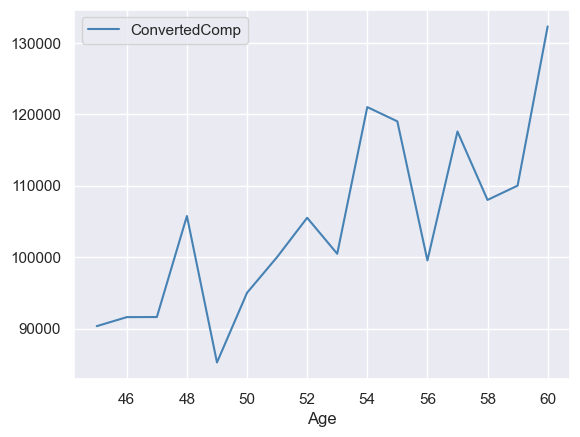

In [432]:
filtered_data = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
grouped_data = filtered_data.groupby('Age')[['ConvertedComp']].median()
colors_list = ['steelblue', 'red']
grouped_data.plot(kind='line', stacked=True, color=colors_list)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: xlabel='count', ylabel='MainBranch'>

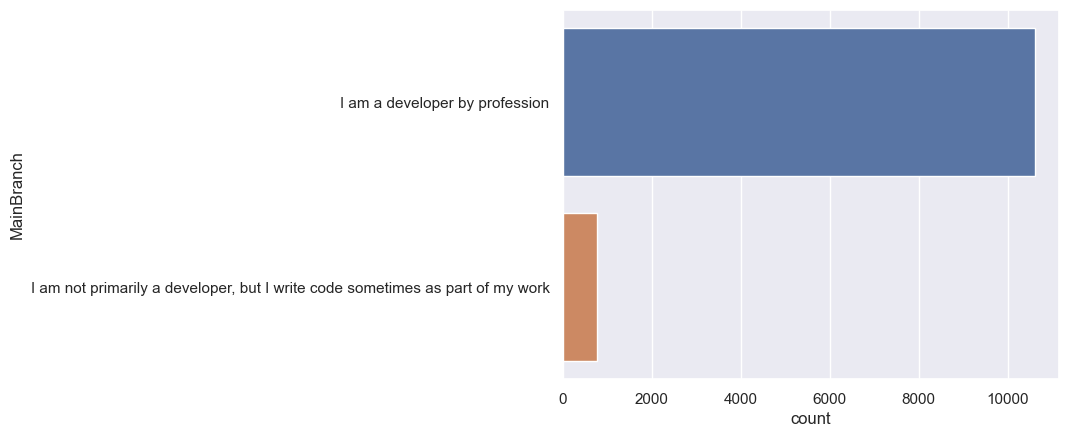

In [433]:
sns.countplot(df, y='MainBranch')

Close the database connection.


In [434]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
